In [2]:
! ls Data
print('')
! ls Data/output/

1519759656_39328483.csv
2017 PMP Data Final No Duplicates.xlsx
Federal_VDC_Relation_web_clean.xlsx
Federal_VDC_Relation_web.xlsx
nepal_population_household_ward-2011.csv
NM_2016_17export.csv
npl_polbanda_adm5_wad_25k_sdn_wgs84.csv
output

District_Province_Population  pop_incidents_VDC.csv
NM_2016_17clean.csv	      sources_vdc.csv


In [3]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#set up a custom qualitative color palette
xkcd_colors = ['purple','green','blue','pink','brown','red','light blue',\
              'tan','light green','magenta','yellow','sky blue','teal','orange','light purple']
catpal = sns.xkcd_palette(xkcd_colors)



#Import Main Data Frame
cleanpath='Data/output/NM_2016_17clean.csv'
df = pd.read_csv(cleanpath)

print(df.shape[0],'x',df.shape[1])
#df.columns

6630 x 68


In [4]:
# convert 'INCIDENT DATE' column to date time objects (and limit to 2017)
df['INCIDENT DATE'] = pd.to_datetime(df['INCIDENT DATE'])
df.index  = df['INCIDENT DATE']
df = df['2017']
print(df.shape)
df.head()

(3541, 68)


INCIDENT NUMBER  \
INCIDENT DATE                    
2017-12-30               17685   
2017-12-30               17684   
2017-12-27               17675   
2017-12-23               17670   
2017-12-22               17668   

                                                  INCIDENT TITLE  \
INCIDENT DATE                                                      
2017-12-30     Newspaper: Bank section of transportation mana...   
2017-12-30     Janakpur Express: Madhesh movement victims pro...   
2017-12-27     Janakpur Express: Nawarang hotel vandalized | ...   
2017-12-23     Janakpur Today: Students padlocked technical s...   
2017-12-22     Janakpur Today: Students protest in front of D...   

              INCIDENT DATE  \
INCIDENT DATE                 
2017-12-30       2017-12-30   
2017-12-30       2017-12-30   
2017-12-27       2017-12-27   
2017-12-23       2017-12-23   
2017-12-22       2017-12-22   

                                                        LOCATION  \
INCIDENT DATE                                                      
2017-12-30     Janakpur, Dhanusa, JANAKPUR, Central Developme...   
2017-12-30     Janakpur, Dhanusa, JANAKPUR, Central Developme...   
2017-12-27     Janakpur, Dhanusa, JANAKPUR, Central Developme...   
2017-12-23     Dhanusadham, Dhanusa, JANAKPUR, Central Develo...   
2017-12-22     Rajbiraj, Saptari, SAGARMATHA, Eastern Develop...   

                                                     DESCRIPTION  \
INCIDENT DATE                                                      
2017-12-30     Alert: Dhanusha/Dec 30, Yatayat byawastha kary...   
2017-12-30     Alert: Dhanusha/Dec 30, Tesro madhesh andolan ...   
2017-12-27     Alert: Dhanusha/Dec 27, Janakpur ko shiva chow...   
2017-12-23     Alert: Dhanusha/Dec 23, Niyamit pathanpathan k...   
2017-12-22     Alert: Saptari/Dec 22, Little angels boarding ...   

                                                        CATEGORY   LATITUDE  \
INCIDENT DATE                                                                 
2017-12-30     News Media, Incident, Announcements / Demands,...  26.730245   
2017-12-30     LOCAL COMMUNITIES, Protest / Demonstration, Ne...  26.727996   
2017-12-27     Nepal Police (responding), News Media, Vandali...  26.735339   
2017-12-23     News Media, District Education Office / MoE, I...  26.819670   
2017-12-22     Nepal Police (responding), Protest / Demonstra...  26.501006   

               LONGITUDE         HLCIT CODE LOCATION ACCURACY   ...     \
INCIDENT DATE                                                   ...      
2017-12-30     85.927913  524 2 04 17 3 001  Municipality/VDC   ...      
2017-12-30     85.927458  524 2 04 17 3 001  Municipality/VDC   ...      
2017-12-27     85.936133  524 2 04 17 3 001  Municipality/VDC   ...      
2017-12-23     86.055004  524 2 04 17 5 050  Municipality/VDC   ...      
2017-12-22     86.772946  524 1 03 15 5 033  Municipality/VDC   ...      

              Female Abducted Youth -25 years or below- abducted  \
INCIDENT DATE                                                      
2017-12-30                0.0                                0.0   
2017-12-30                0.0                                0.0   
2017-12-27                0.0                                0.0   
2017-12-23                0.0                                0.0   
2017-12-22                0.0                                0.0   

              Total Buildings Severe Building Damage  Total Vehicles  \
INCIDENT DATE                                                          
2017-12-30                0.0                    0.0             0.0   
2017-12-30                0.0                    0.0             0.0   
2017-12-27                1.0                    0.0             0.0   
2017-12-23                0.0                    0.0             0.0   
2017-12-22                0.0                    0.0             0.0   

              Severe Vehicle Damage Election-related  specific cause pri

### Start with some time series analysis - predict levels of violence based on previous weeks.

In [5]:
#One-hot encode categorical columns
incidents_date = pd.get_dummies(df, columns=['Violent vs non-violent', 'One-sided vs two-sided', 'Number of Deaths',
       'Collective vs interpersonal', 'Forms and Causes',
       'Event form - primary', 'Event form - secondary', 'Weapon', 'Weapon 2',
       'Cause - primary', 'Cause - secondary', 'Crosscutting issues',
       'Actor 1 - Perpetrator Type',
       'Actor 1 - Youth -25 years or below- involvement',
       'Target - if one-sided violence',
       'Perpetrator 2 - if two-sided violence',
       'Actor 2 - Youth -25 years or below- involvement', 'Impacts','Election-related specific cause secondary'])#.join(source_dum, on='INCIDENT NUMBER', rsuffix='_r')
incidents_date = incidents_date.dropna(axis=1, how='all')
incidents_date = incidents_date.drop(['Ward','Ward(New)','INCIDENT NUMBER','LATITUDE','LONGITUDE','VERIFIED'],axis=1)
#incidents_date.head()
in_week = incidents_date.resample('W').sum()
in_day = incidents_date.resample('D').sum()
in_week.head()
print(in_week.shape)

(53, 340)


In [6]:
in_week.columns

Index(['Number of Injuries', 'Total Killed', 'Female Killed',
       'Youth -25 years or below- killed', 'Total Injured', 'Female Injured',
       'Total no. of Rape or Attempted Rape',
       'Female no. Rape or Attempted Rape',
       'Rape or Attempted Rape - Youth - 25 years or below', 'Total Abducted',
       ...
       'Perpetrator 2 - if two-sided violence_Students (2301)',
       'Perpetrator 2 - if two-sided violence_Unclear (9999)',
       'Actor 2 - Youth -25 years or below- involvement_No-youth',
       'Actor 2 - Youth -25 years or below- involvement_Unknown',
       'Actor 2 - Youth -25 years or below- involvement_Youth',
       'Election-related specific cause secondary_Constestation regarding implementation and legitimacy of election',
       'Election-related specific cause secondary_Contestation regarding the outcome of election',
       'Election-related specific cause secondary_Contestation related to CoC',
       'Election-related specific cause secondary_Contestat

In [7]:
#function for converting pandas time series df to training set for supervised learning
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
        Returns:
        Pandas DataFrame of series framed for supervised learning.
        https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [46]:
#Create a time shifted dataframe of all variables.
lookback = 20
time_shift_week = series_to_supervised(in_week, lookback, dropnan=False)
time_shift_day = series_to_supervised(in_day, lookback, dropnan=False)
print(time_shift_day.shape)
time_shift_day.head()

(364, 7140)


var1(t-20)  var2(t-20)  var3(t-20)  var4(t-20)  var5(t-20)  \
INCIDENT DATE                                                               
2017-01-01            NaN         NaN         NaN         NaN         NaN   
2017-01-02            NaN         NaN         NaN         NaN         NaN   
2017-01-03            NaN         NaN         NaN         NaN         NaN   
2017-01-04            NaN         NaN         NaN         NaN         NaN   
2017-01-05            NaN         NaN         NaN         NaN         NaN   

               var6(t-20)  var7(t-20)  var8(t-20)  var9(t-20)  var10(t-20)  \
INCIDENT DATE                                                                
2017-01-01            NaN         NaN         NaN         NaN          NaN   
2017-01-02            NaN         NaN         NaN         NaN          NaN   
2017-01-03            NaN         NaN         NaN         NaN          NaN   
2017-01-04            NaN         NaN         NaN         NaN          NaN   
2017-01-05            NaN         NaN         NaN         NaN          NaN   

                 ...      var331(t)  var332(t)  var333(t)  var334(t)  \
INCIDENT DATE    ...                                                   
2017-01-01       ...            0.0        0.0        0.0        1.0   
2017-01-02       ...            0.0        0.0        2.0        0.0   
2017-01-03       ...            0.0        0.0        1.0        3.0   
2017-01-04       ...            0.0        0.0        2.0        0.0   
2017-01-05       ...            0.0        0.0        1.0        1.0   

               var335(t)  var336(t)  var337(t)  var338(t)  var339(t)  \
INCIDENT DATE                                                          
2017-01-01           1.0        0.0        0.0        0.0        0.0   
2017-01-02           2.0        0.0        0.0        0.0        0.0   
2017-01-03           1.0        0.0        0.0        0.0        0.0   
2017-01-04           2.0        0.0        0.0        0.0        0.0   
2017-01-05           0.0        0.0        0.0        0.0        0.0   

               var340(t)  
INCIDENT DATE             
2017-01-01           0.0  
2017-01-02           0.0  
2017-01-03           0.0  
2017-01-04           0.0  
2017-01-05           0.0  

[5 rows x 7140 columns]

### Train your predictive model on the above data frame.
For any given variable t-n represents one step back. 
try to find a way to predict everything with everything? find out which are the most acurate?
 - let's start with one. 
  - note... at some point try to preserve labels, so you know what is actually contributing. 

must create train test sets of the array above
test reserve will be this years data


In [52]:
#Create X
X = time_shift_week.loc[:,:'var340(t-1)']#you can probably create this string later to try different numbers
#X = pd.concat([df1, df2], ignore_index=False, keys=['t-1','t-2']).swaplevel().sort_index()

X.head()

var1(t-20)  var2(t-20)  var3(t-20)  var4(t-20)  var5(t-20)  \
INCIDENT DATE                                                               
2017-01-01            NaN         NaN         NaN         NaN         NaN   
2017-01-08            NaN         NaN         NaN         NaN         NaN   
2017-01-15            NaN         NaN         NaN         NaN         NaN   
2017-01-22            NaN         NaN         NaN         NaN         NaN   
2017-01-29            NaN         NaN         NaN         NaN         NaN   

               var6(t-20)  var7(t-20)  var8(t-20)  var9(t-20)  var10(t-20)  \
INCIDENT DATE                                                                
2017-01-01            NaN         NaN         NaN         NaN          NaN   
2017-01-08            NaN         NaN         NaN         NaN          NaN   
2017-01-15            NaN         NaN         NaN         NaN          NaN   
2017-01-22            NaN         NaN         NaN         NaN          NaN   
2017-01-29            NaN         NaN         NaN         NaN          NaN   

                  ...       var331(t-1)  var332(t-1)  var333(t-1)  \
INCIDENT DATE     ...                                               
2017-01-01        ...               NaN          NaN          NaN   
2017-01-08        ...               0.0          0.0          0.0   
2017-01-15        ...               0.0          0.0          9.0   
2017-01-22        ...               0.0          0.0          7.0   
2017-01-29        ...               0.0          0.0          7.0   

               var334(t-1)  var335(t-1)  var336(t-1)  var337(t-1)  \
INCIDENT DATE                                                       
2017-01-01             NaN          NaN          NaN          NaN   
2017-01-08             1.0          1.0          0.0          0.0   
2017-01-15             6.0         11.0          0.0          0.0   
2017-01-22             6.0         15.0          0.0          0.0   
2017-01-29            13.0          8.0          0.0          0.0   

               var338(t-1)  var339(t-1)  var340(t-1)  
INCIDENT DATE                                         
2017-01-01             NaN          NaN          NaN  
2017-01-08             0.0          0.0          0.0  
2017-01-15             0.0          0.0          0.0  
2017-01-22             0.0          0.0          0.0  
2017-01-29             0.0          0.0          0.0  

[5 rows x 6800 columns]

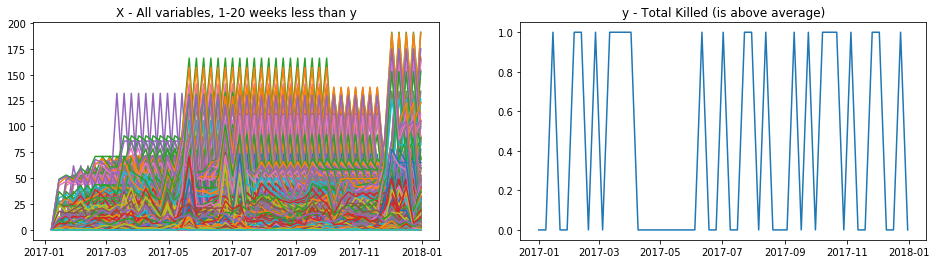

In [53]:
#Plot what these look like
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(X)
ax1.set_title('X - All variables, 1-{} weeks less than y'.format(int(lookback)))
ax2.plot(y)
ax2.set_title('y - Total Killed (is above average)')
plt.show()

train score: 0.945945945946
test score: 0.375
confusion matrix
 [[4 4]
 [6 2]]
crossvalidation mean: 7.90505033346e-323 [  7.90505033e-323   7.90505033e-323   7.90505033e-323]


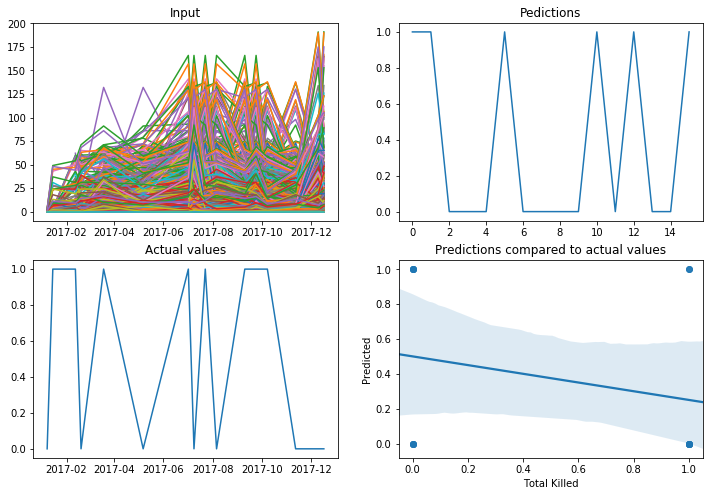

In [127]:
#Train and test a model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import BayesianRidge
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

#create imputer for nan values 
imp = Imputer(missing_values='NaN', strategy = 'most_frequent')

#create fuction to train model and find a variable than can be predicted from the previous week's data
def try_model(X, y, model, verbose=0):

 

    #Split X and Y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

    #create preprocessing pipline with imputation 
    pipeline = Pipeline([('imputation', imp,),('model',model)])

    #fit the model to the training set
    pipeline.fit(X_train, y_train)

    #test model
    y_pred = pipeline.predict(X_test)
    
    #score model
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    #r_2 = r2_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)#crossvalidate accross the dataset
    #check if the true negatives are at least as big as 1/4 of the true positives before crossvalidating
    if test_score > 0.5 and cm[1][1] > cm[0][0]/4:
        cv_score = cross_val_score(pipeline, X, y, cv=3,)# scoring='r2')
    else:
        cv_score = np.empty(3)
    
    if verbose > 0:
        #print scores
        print('train score:', train_score )
        print('test score:', test_score)
        #print('R2 score:', r_2)
        print('confusion matrix\n', cm)
        print('crossvalidation mean:',cv_score.mean(), cv_score)
    
    if verbose > 1:
        #Plot what these look like
        f, (ax0, ax1) = plt.subplots(2,2, figsize=(12,8))
        ax0[0].plot(X_test.sort_index())
        ax0[0].set_title('Input')
        ax0[1].plot(y_pred)
        ax0[1].set_title('Pedictions')
        ax1[0].plot(y_test.sort_index())
        ax1[0].set_title('Actual values')
        sns.regplot(y_test, y_pred)
        ax1[1].set_title('Predictions compared to actual values')
        ax1[1].set_ylabel('Predicted')
        plt.show()
    
    return cv_score, test_score, cm
    
y = in_week.loc[:,'Total Killed'] > in_week.loc[:,'Total Killed'].median()
dry_run = try_model(X, y, MultinomialNB(), verbose = 2)


In [128]:
#find which variables have the best crossvalidation scores
def find_var (X, df, model, n_true, verbose=False):
    scores = pd.DataFrame(index=df.columns[1:], columns=['cv_mean','test_score','confusion_matrix','pc_true'])
    for var in df.columns[1:]:
        y = in_week[var] > in_week[var].median()
        #X = time_shift.loc[:,'var1(t-1)':'var340(t-1)']
        n_class = y.nunique()
        n_bins = 10
        #n_true = 10
        pc_true = sum(y == 1)/len(y)*100
        
        if verbose == True:
            print('\n')
            print(var)
        if verbose == False:
                print('.', end=' ')
        if pc_true > n_true: #make it a percentage
      
            cv_score, test_score, cm = try_model(X, y, model, verbose = verbose)
        
                  
            scores['cv_mean'][var] = cv_score.mean()
            scores['test_score'][var] = test_score
            scores['confusion_matrix'][var] = cm
            scores['pc_true'][var] = pc_true
        
    
    print('bing!')   
    return scores
cv_scores = find_var(X, in_week, MultinomialNB(), n_true=30, verbose=False)
top10 = cv_scores.sort_values('cv_mean', ascending=False)[:10]
top10

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . bing!


cv_mean test_score  \
Crosscutting issues_Elections,Constitutional Pr...  0.724458       0.75   
Crosscutting issues_Constitutional Process,Loca...  0.715686     0.9375   
Collective vs interpersonal_Collective              0.698257       0.75   
Event form - primary_Violent - Group Clash (02)     0.683179     0.5625   
Event form - primary_Non-violent - Gherau/Dharn...   0.66122      0.875   
Weapon_ ()                                          0.657952       0.75   
Violent vs non-violent_Non-violent                  0.657952      0.875   
Weapon_Small arms (5)                               0.650155     0.6875   
Total Buildings                                     0.641612       0.75   
Target - if one-sided violence_ ()                  0.640523     0.6875   

                                                     confusion_matrix  pc_true  
Crosscutting issues_Elections,Constitutional Pr...   [[7, 3], [1, 5]]  35.8491  
Crosscutting issues_Constitutional Process,Loca...  [[10, 1], [0, 5]]  39.6226  
Collective vs interpersonal_Collective               [[3, 2], [2, 9]]  49.0566  
Event form - primary_Violent - Group Clash (02)      [[5, 6], [1, 4]]  41.5094  
Event form - primary_Non-violent - Gherau/Dharn...  [[10, 1], [1, 4]]  32.0755  
Weapon_ ()                                           [[7, 3], [1, 5]]   45.283  
Violent vs non-violent_Non-violent                   [[7, 0], [2, 7]]   45.283  
Weapon_Small arms (5)                                [[7, 4], [1, 4]]  30.1887  
Total Buildings                                      [[8, 2], [2, 4]]   45.283  
Target - if one-sided violence_ ()                   [[8, 2], [3, 3]]  37.7358

train score: 0.891891891892
test score: 0.75
confusion matrix
 [[6 2]
 [2 6]]
crossvalidation mean: 0.724458204334 [ 0.52631579  1.          0.64705882]


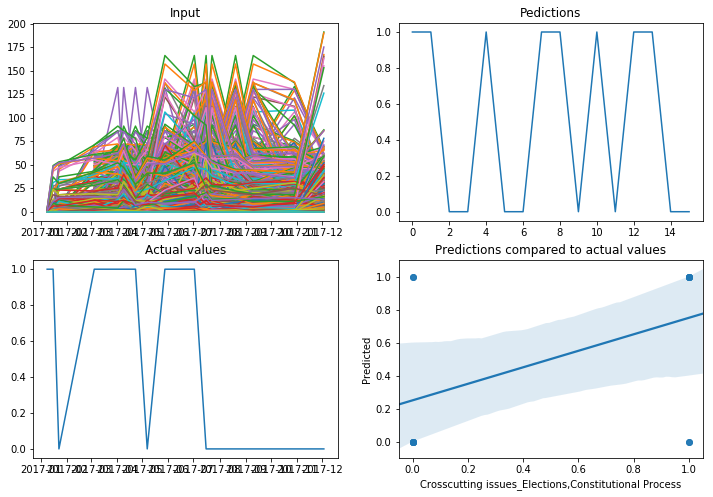

train score: 0.891891891892
test score: 0.875
confusion matrix
 [[10  1]
 [ 1  4]]
crossvalidation mean: 0.71568627451 [ 0.5         1.          0.64705882]


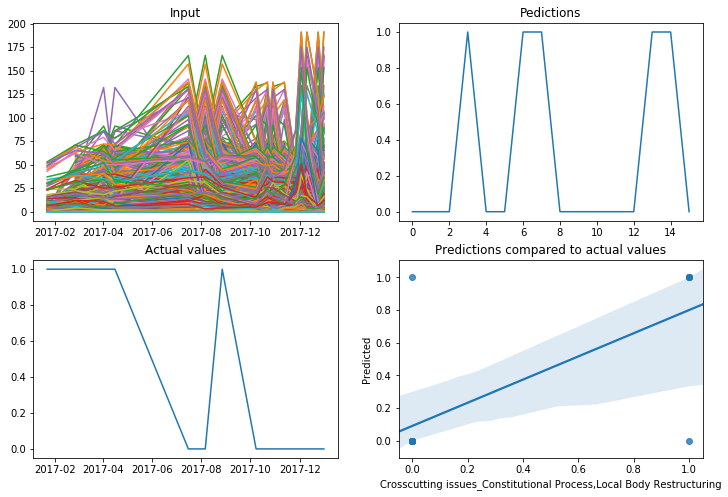

train score: 0.864864864865
test score: 0.75
confusion matrix
 [[4 2]
 [2 8]]
crossvalidation mean: 0.69825708061 [ 0.55555556  0.83333333  0.70588235]


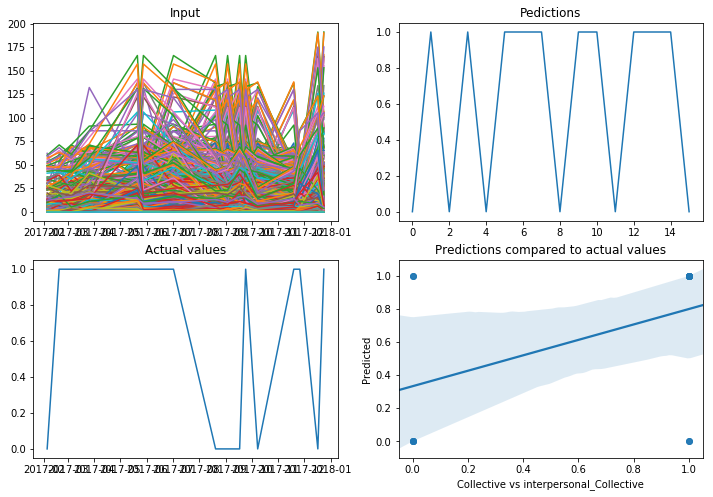

train score: 0.945945945946
test score: 0.6875
confusion matrix
 [[6 3]
 [2 5]]
crossvalidation mean: 0.683178534572 [ 0.57894737  0.70588235  0.76470588]


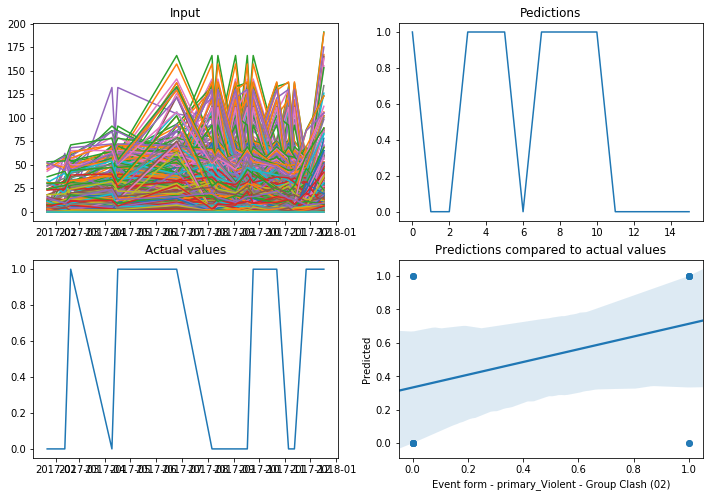

train score: 0.945945945946
test score: 0.625
confusion matrix
 [[6 6]
 [0 4]]
crossvalidation mean: 0.661220043573 [ 0.5         0.77777778  0.70588235]


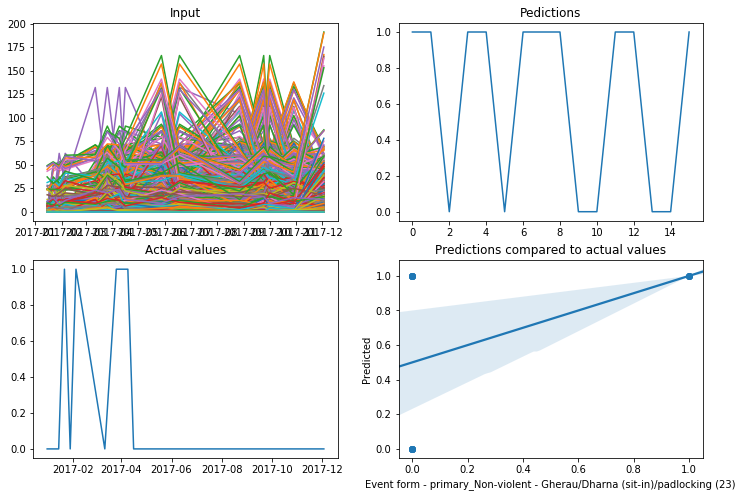

train score: 0.945945945946
test score: 0.5625
confusion matrix
 [[7 2]
 [5 2]]
crossvalidation mean: 0.657952069717 [ 0.55555556  0.88888889  0.52941176]


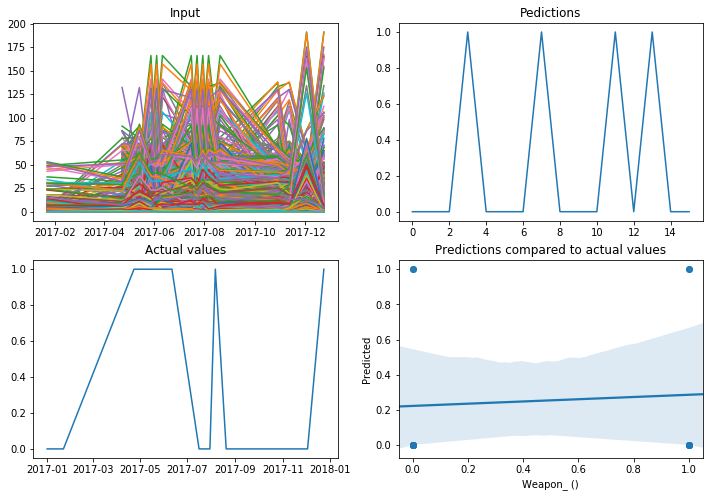

train score: 0.918918918919
test score: 0.625
confusion matrix
 [[7 3]
 [3 3]]
crossvalidation mean: 0.657952069717 [ 0.55555556  0.88888889  0.52941176]


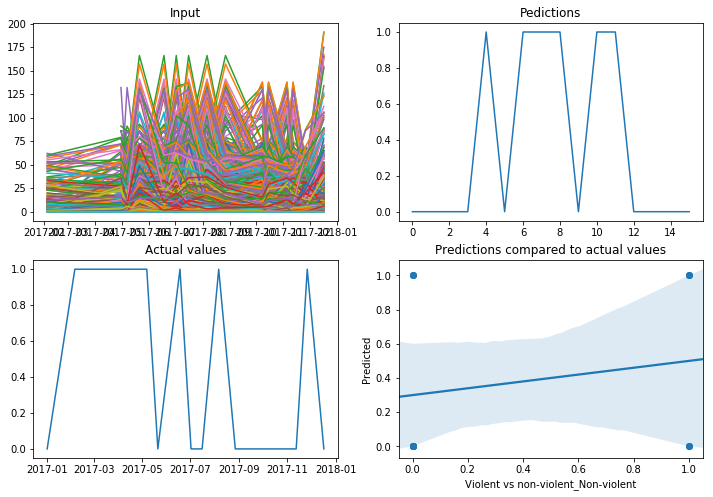

train score: 0.891891891892
test score: 0.5625
confusion matrix
 [[8 4]
 [3 1]]
crossvalidation mean: 7.90505033346e-323 [  7.90505033e-323   7.90505033e-323   7.90505033e-323]


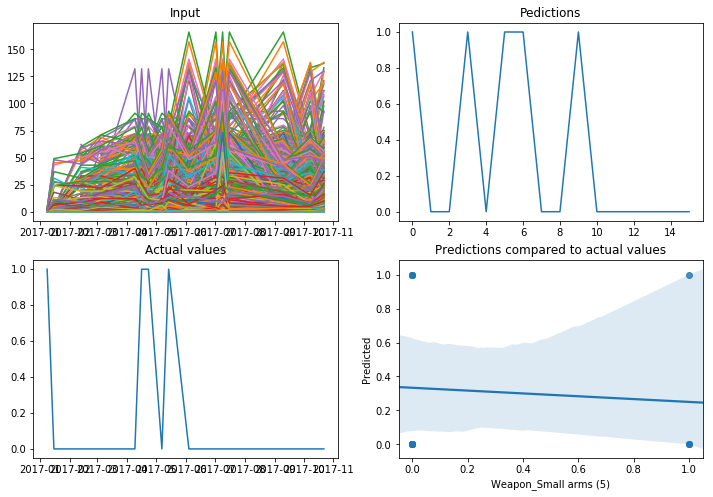

train score: 0.918918918919
test score: 0.625
confusion matrix
 [[4 3]
 [3 6]]
crossvalidation mean: 0.641612200436 [ 0.66666667  0.61111111  0.64705882]


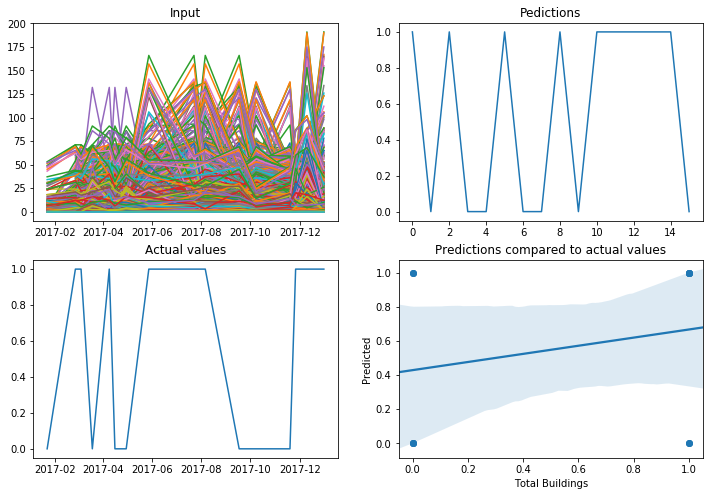

train score: 0.891891891892
test score: 0.5625
confusion matrix
 [[6 5]
 [2 3]]
crossvalidation mean: 0.640522875817 [ 0.55555556  0.77777778  0.58823529]


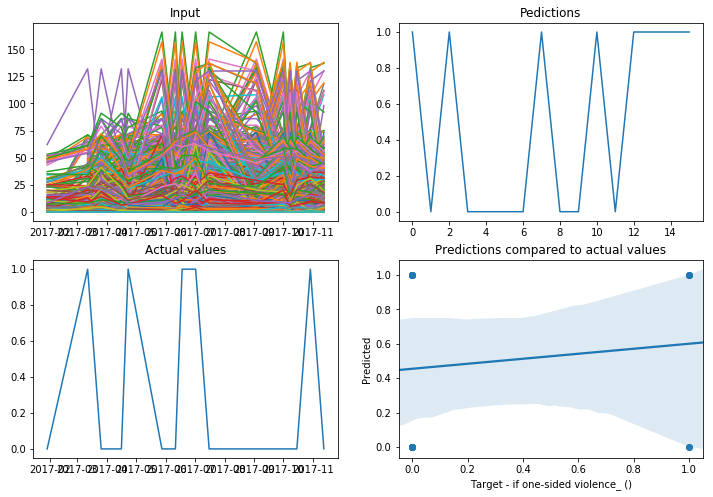

In [131]:
for cat in top10.index:
    y = in_week[cat] > in_week[cat].median()
    try_model(X, y, MultinomialNB(), verbose = 2)

In [75]:
from sklearn.naive_bayes import BernoulliNB

BNB_scores = find_var(X, in_week, BernoulliNB(), verbose=False)
BNB_top10 = BNB_scores.sort_values('cv_mean', ascending=False)[:10]
BNB_top10

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . bing!


Note effectiveness of MultinomialNB() at predicting above average communal violence and sit ins based on indicators from the previous week. It may be worth exploring what those indicators are... and testing on the hold out set of this years data. 

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


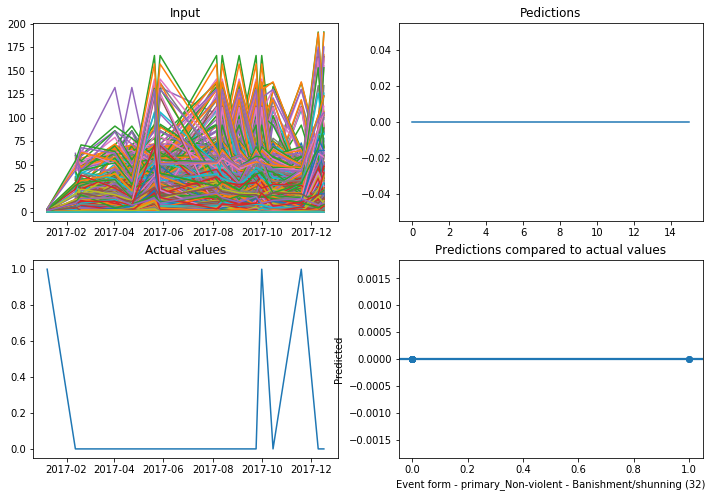

train score: 0.918918918919
test score: 0.8125
R2 score: -0.230769230769
confusion matrix
 [[13  0]
 [ 3  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.886710239651 [ 0.88888889  0.88888889  0.88235294]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


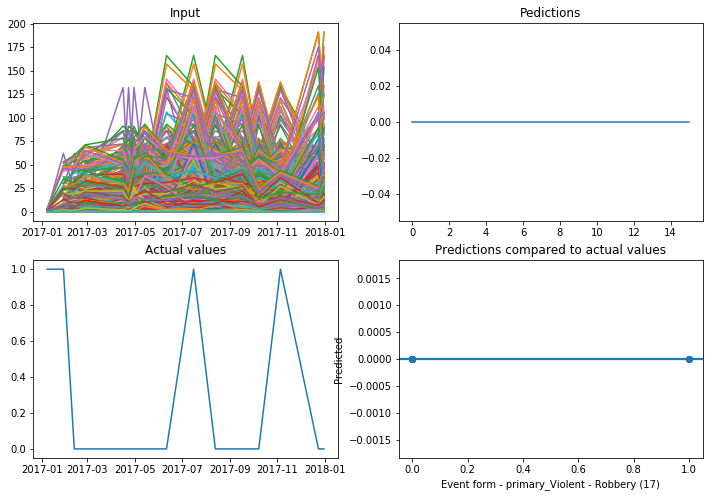

train score: 0.945945945946
test score: 0.75
R2 score: -0.333333333333
confusion matrix
 [[12  0]
 [ 4  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.79302832244 [ 0.77777778  0.77777778  0.82352941]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


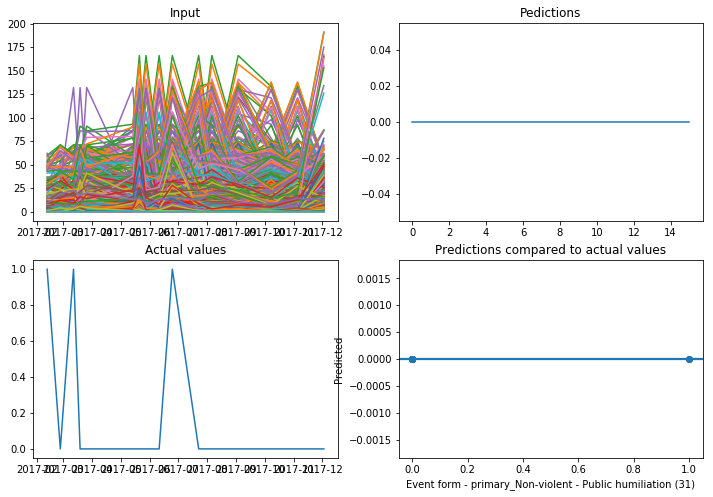

train score: 0.945945945946
test score: 0.8125
R2 score: -0.230769230769
confusion matrix
 [[13  0]
 [ 3  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.79302832244 [ 0.77777778  0.77777778  0.82352941]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


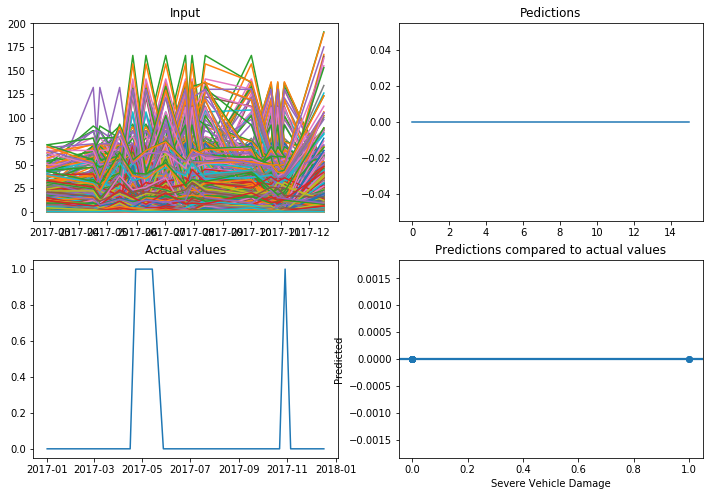

train score: 0.945945945946
test score: 0.8125
R2 score: -0.230769230769
confusion matrix
 [[13  0]
 [ 3  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.79302832244 [ 0.77777778  0.77777778  0.82352941]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


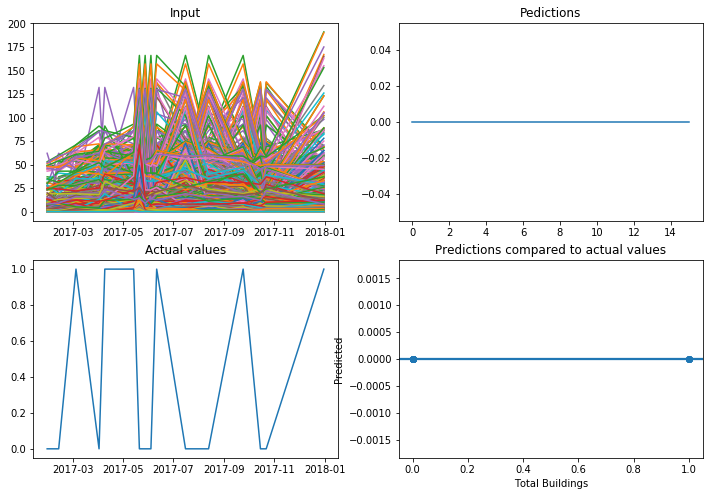

train score: 0.972972972973
test score: 0.625
R2 score: -0.6
confusion matrix
 [[10  0]
 [ 6  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.735810113519 

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[ 0.73684211  0.70588235  0.76470588]


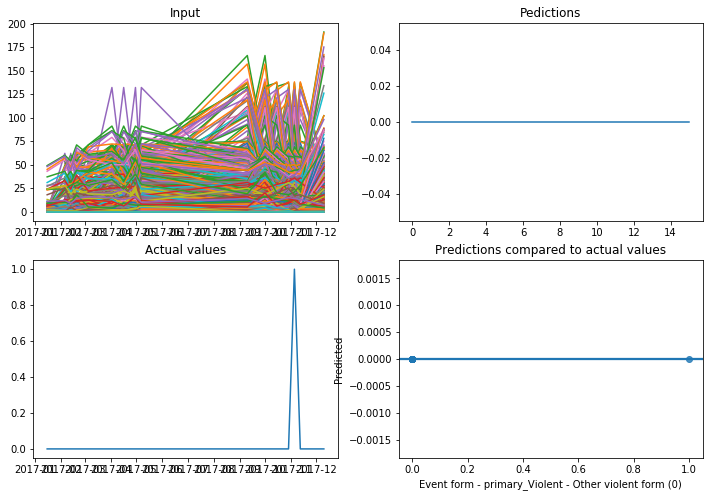

train score: 0.945945945946
test score: 0.9375
R2 score: -0.0666666666667
confusion matrix
 [[15  0]
 [ 1  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.830065359477 [ 0.83333333  0.83333333  0.82352941]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


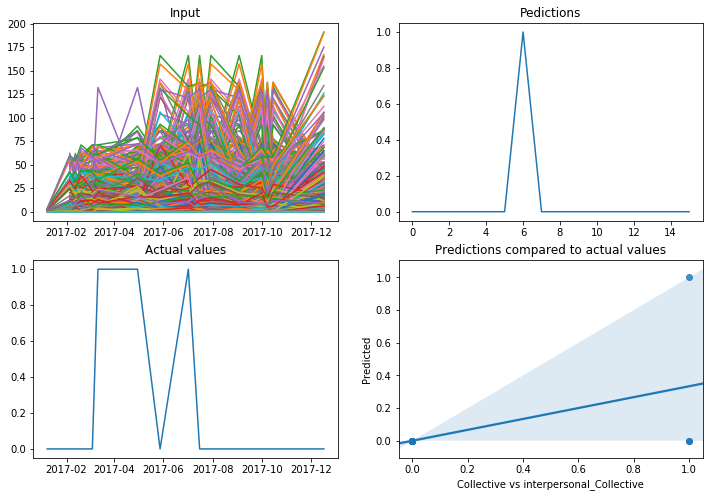

train score: 1.0
test score: 0.875
R2 score: 0.179487179487
confusion matrix
 [[13  0]
 [ 2  1]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.69825708061 [ 0.66666667  0.72222222  0.70588235]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


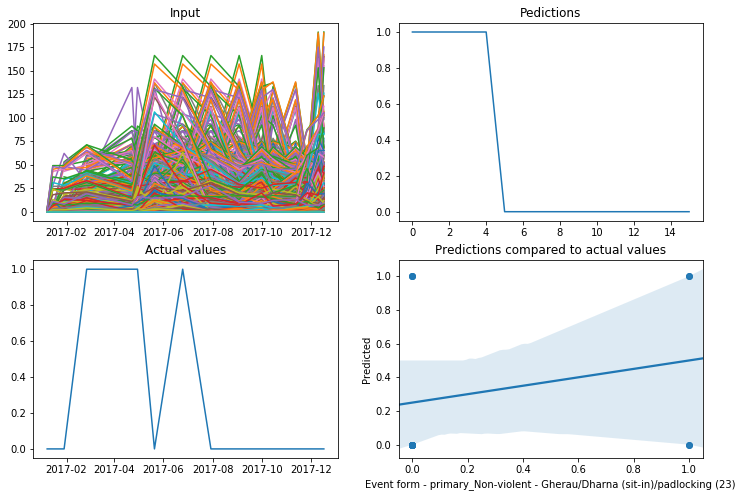

train score: 0.891891891892
test score: 0.6875
R2 score: -0.666666666667
confusion matrix
 [[9 3]
 [2 2]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.69825708061 [ 0.66666667  0.72222222  0.70588235]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


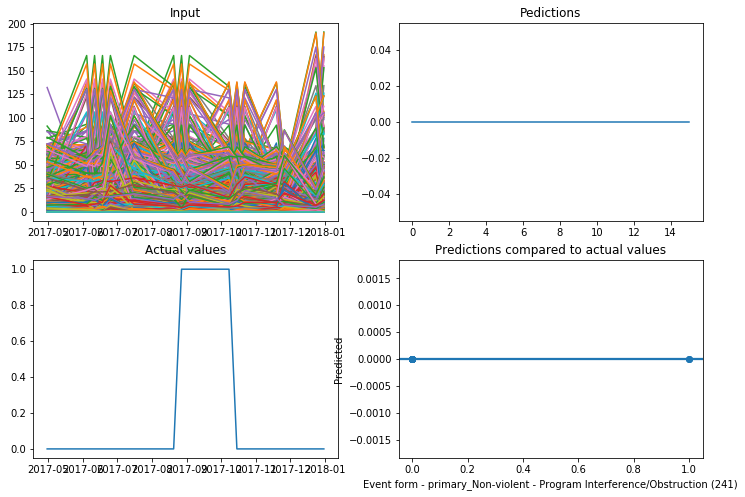

train score: 0.972972972973
test score: 0.8125
R2 score: -0.230769230769
confusion matrix
 [[13  0]
 [ 3  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.733746130031 [ 0.78947368  0.58823529  0.82352941]


/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


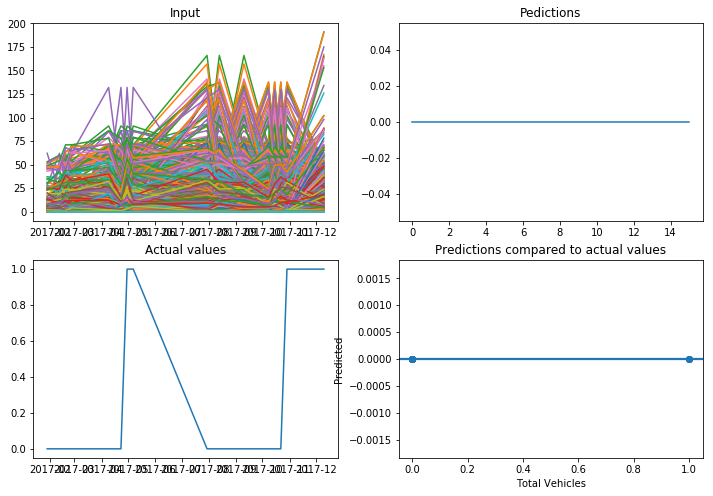

train score: 0.945945945946
test score: 0.75
R2 score: -0.333333333333
confusion matrix
 [[12  0]
 [ 4  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.79302832244 [ 0.77777778  0.77777778  0.82352941]


In [80]:
for cat in top10.index:
    y = in_week[cat] > in_week[cat].mean()
    #if top6['nunique'][cat] > 2:
    try_model(X, y, BernoulliNB())

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


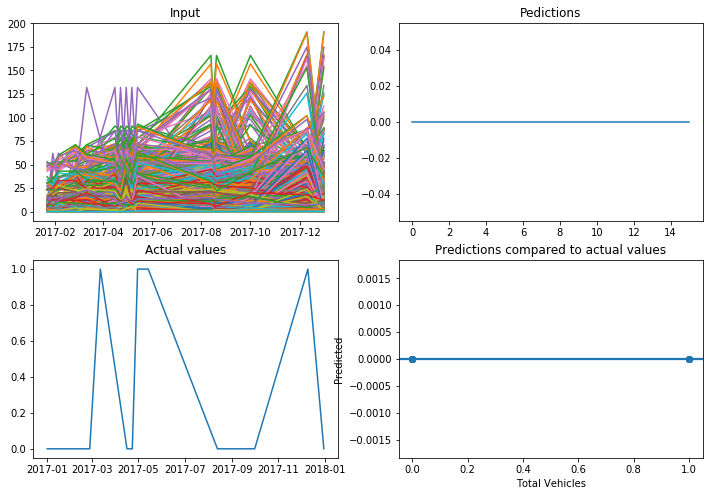

train score: 0.945945945946
test score: 0.6875
R2 score: -0.454545454545
confusion matrix
 [[11  0]
 [ 5  0]]


/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:538: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


crossvalidation mean: 0.773420479303 [ 0.77777778  0.77777778  0.76470588]


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rgs = RandomForestRegressor()
cls = RandomForestClassifier()
y = 
try_model(X, y, cls)

In [ ]:
top6 = cv_scores.sort_values('cv_mean', ascending=False)[:6]
top6